In [147]:
from math import sqrt
import numpy as np
import sympy as sm

import matplotlib.pyplot as plt
import pandas as pd
#from scipy.optimize import curve_fit
from lab_processing import print_errors, create_plot

In [148]:
x, y = sm.symbols('x y')

In [176]:
#y' = f
f = (- 2*x**2 + y**2 - 3*x*y)/(x**2 - x*y)
#f = 3*x * y + x*y**2
#f = x**3 + (2*x**2 + 1)*y + x*y**2
#x ∈ (x_0; x_N)
x_0 = -1
x_N = -0.01
#accuracy
epsln = 10**(-4)
#y(x_0) = ...
y_0 = 1
#initial number of grid nodes
N_nodes = 22
#initial grid step
h = (x_N - x_0)/N_nodes
#h = 0.02727272727272727/2

In [177]:
f

(-2*x**2 - 3*x*y + y**2)/(x**2 - x*y)

In [178]:
#x_grid, h = np.linspace(x_0, x_N, N_nodes, retstep = True)
x_grid = np.arange(x_0, x_N, h)
y_grid = np.empty(x_grid.size)
y_grid[0] = y_0

In [179]:
#for i in range(1, x_grid.size):
 #    y_grid[i] = y_grid[i-1] + h * \
  #              func(x_grid[i-1] + h/2, y_grid[i-1] + h/2*func(x_grid[i-1], y_grid[i-1]))

In [180]:
for i in range(1, x_grid.size):
    y_grid[i] = y_grid[i-1] + \
               h*f.subs([(x, x_grid[i-1] + h/2), \
                       (y, y_grid[i-1] + h/2*f.subs([(x, x_grid[i-1]), \
                                                     (y, y_grid[i-1])]) \
                       )])

In [181]:
#x_grid_2h, h_2 = np.linspace(x_0, x_N, 2*N_nodes + 1, retstep = True)
k = int (704/N_nodes)
N_nodes = 88*8
#initial grid step
h_2 = (x_N - x_0)/N_nodes
#h = 0.02727272727272727/2
x_grid_2h = np.arange(x_0, x_N + 0.001, h_2)
y_grid_2h = np.empty(x_grid_2h.size)
y_grid_2h[0] = y_0
for i in range(1, x_grid_2h.size):
    y_grid_2h[i] = y_grid_2h[i-1] + \
                h_2*f.subs([(x, x_grid_2h[i-1] + h_2/2), \
                        (y, y_grid_2h[i-1] + h_2/2*f.subs([(x, x_grid_2h[i-1]), \
                                                      (y, y_grid_2h[i-1])]) \
                        )])

In [182]:
k = int (k)

In [183]:
dataset = pd.DataFrame({'x':x_grid,'y':y_grid})
dataset_2 = pd.DataFrame({'x_2':x_grid_2h,'y_2':y_grid_2h})
bb = dataset_2.T
gg = dataset.T
bb

,0,1,2,3,4,5,6,7,8,9,...,695,696,697,698,699,700,701,702,703,704
x_2,-1.0,-0.998594,-0.997187,-0.995781,-0.994375,-0.992969,-0.991562,-0.990156,-0.988750,-0.987344,...,-0.022656,-0.02125,-0.019844,-0.018437,-0.017031,-0.015625,-0.014219,-0.012812,-0.011406,-0.010000
y_2,1.0,1.001410,1.002828,1.004254,1.005689,1.007131,1.008581,1.010039,1.011506,1.012981,...,62.340140,66.46029,71.162316,76.578735,82.885552,90.321660,99.219633,110.056520,123.541635,140.776967


In [184]:
gg

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
x,-1.0,-0.955000,-0.910000,-0.865000,-0.820000,-0.77500,-0.73000,-0.685000,-0.640000,-0.595000,...,-0.460000,-0.41500,-0.370000,-0.32500,-0.280000,-0.235000,-0.190000,-0.145000,-0.100000,-0.05500
y,1.0,1.049097,1.107445,1.176387,1.257475,1.35252,1.46367,1.593519,1.745271,1.922987,...,2.674842,3.03265,3.473614,4.03012,4.755132,5.741364,7.166526,9.417661,13.518069,23.24825


In [195]:
#0.         0.05454545 0.10909091 0.16363636 0.21818182 0.27272727
 #0.32727273 0.38181818 0.43636364 0.49090909 0.54545455 0.6
arr = np.arange(x_0, x_N + 0.001, ((x_N - x_0)/11))
diff_y_h_y_2h = np.empty(x_grid.size)
for i in range(0, arr.size - 1):
    #if x_grid_2h[i] in arr:
        diff_y_h_y_2h[i] = abs(y_grid_2h[k*i] - y_grid[2*i])
        print(x_grid_2h[i])

-1.0
-0.99859375
-0.9971874999999999
-0.9957812499999998
-0.9943749999999998
-0.9929687499999997
-0.9915624999999997
-0.9901562499999996
-0.9887499999999996
-0.9873437499999995
-0.9859374999999995


In [201]:
print(x_grid_2h)

[-1.         -0.99859375 -0.9971875  -0.99578125 -0.994375   -0.99296875
 -0.9915625  -0.99015625 -0.98875    -0.98734375 -0.9859375  -0.98453125
 -0.983125   -0.98171875 -0.9803125  -0.97890625 -0.9775     -0.97609375
 -0.9746875  -0.97328125 -0.971875   -0.97046875 -0.9690625  -0.96765625
 -0.96625    -0.96484375 -0.9634375  -0.96203125 -0.960625   -0.95921875
 -0.9578125  -0.95640625 -0.955      -0.95359375 -0.9521875  -0.95078125
 -0.949375   -0.94796875 -0.9465625  -0.94515625 -0.94375    -0.94234375
 -0.9409375  -0.93953125 -0.938125   -0.93671875 -0.9353125  -0.93390625
 -0.9325     -0.93109375 -0.9296875  -0.92828125 -0.926875   -0.92546875
 -0.9240625  -0.92265625 -0.92125    -0.91984375 -0.9184375  -0.91703125
 -0.915625   -0.91421875 -0.9128125  -0.91140625 -0.91       -0.90859375
 -0.9071875  -0.90578125 -0.904375   -0.90296875 -0.9015625  -0.90015625
 -0.89875    -0.89734375 -0.8959375  -0.89453125 -0.893125   -0.89171875
 -0.8903125  -0.88890625 -0.8875     -0.88609375 -0

In [202]:
print(arr)

[-1.   -0.91 -0.82 -0.73 -0.64 -0.55 -0.46 -0.37 -0.28 -0.19 -0.1  -0.01]


In [203]:
print(diff_y_h_y_2h)

[0.00000000e+00 5.82066558e-02 1.49712482e-01 2.86749697e-01
 4.86998338e-01 7.78321863e-01 1.20965551e+00 1.87808997e+00
 3.00724644e+00 5.24014718e+00 1.13817066e+01 5.74675202e-03
 7.60085488e-03 1.02528758e-02 1.42208168e-02 2.04906292e-02
 3.10948671e-02 5.06794956e-02 9.14465974e-02 1.92458382e-01
 5.24072907e-01 2.40569600e+00]


In [204]:
print('Accuracy: ', diff_y_h_y_2h.max() / (2**3 - 1), '< 10**(-4)')

Accuracy:  1.6259580862439371 < 10**(-4)


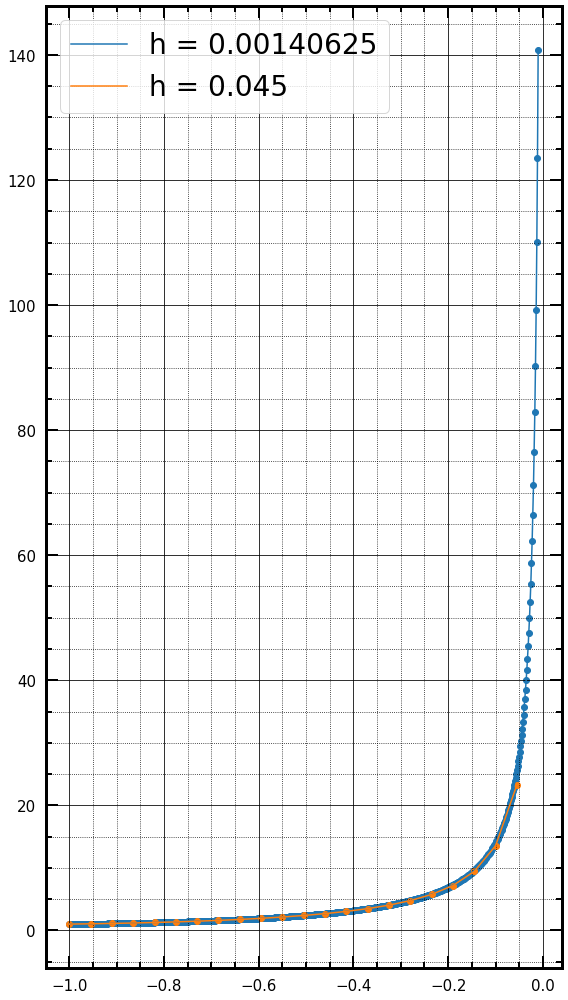

In [200]:
fig, ax = create_plot(10,10)
ax.plot(x_grid_2h, y_grid_2h, label=f'h = {h_2}')
ax.scatter(x_grid_2h, y_grid_2h)

ax.plot(x_grid, y_grid, label= f'h = {h}')
ax.scatter(x_grid, y_grid)


#ax.set_xlabel('$x_n$', fontsize=32)
#ax.set_ylabel('$y_n$', fontsize=32)
ax.legend(fontsize=28)
fig.set_figwidth(8)
fig.set_figheight(14)
fig.tight_layout()
fig.savefig(f'graphs/plot_{2}.pdf')